(20, 20, 4)


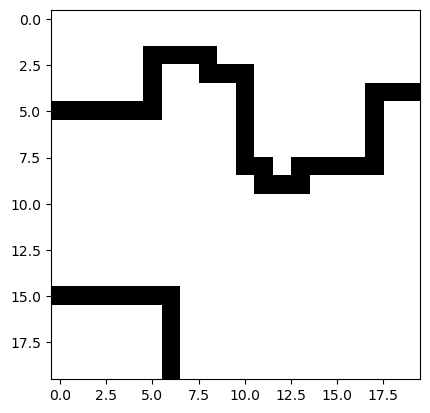

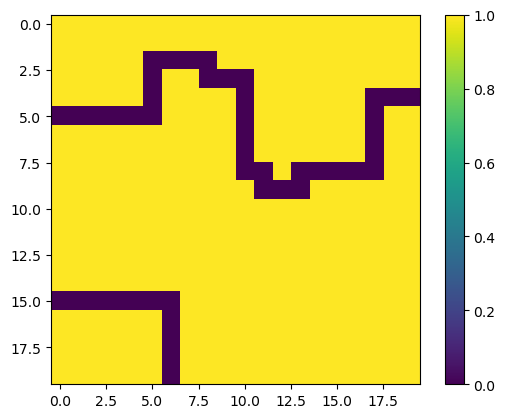

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import  Image
i = Image.open('test_0.png')
img_np = np.asarray(i)
print(img_np.shape)
plt.imshow(i)
plt.show()
img_np.max()
labirint = np.int32(np.linalg.norm(img_np[:,:, :3], axis=-1) > 255)
plt.imshow(labirint)
plt.colorbar()
plt.show()

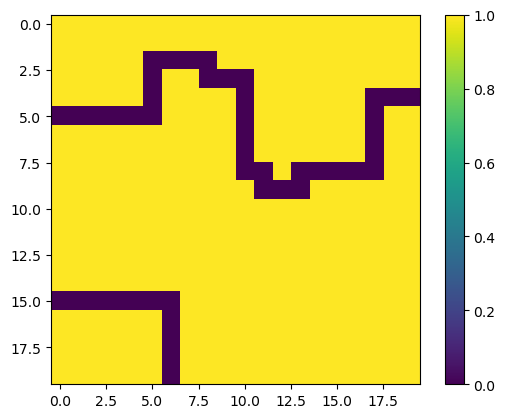

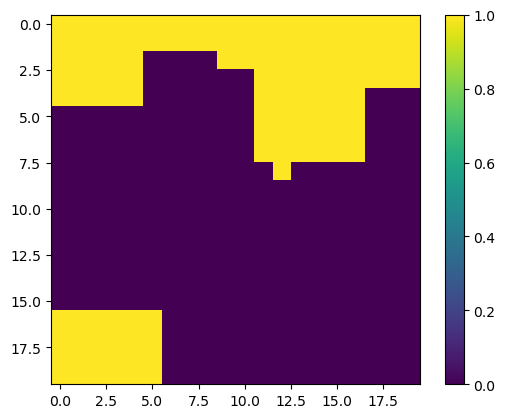

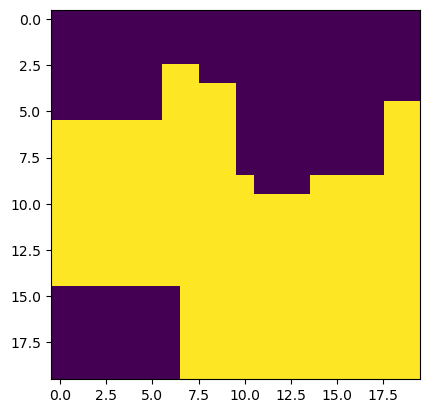

In [3]:
import cv2
import copy
labirint_filled = copy.deepcopy(labirint)
cv2.floodFill(labirint_filled, np.zeros(np.array(labirint.shape)+2, dtype=np.uint8), (18,18), 0)
plt.imshow(labirint)
plt.colorbar()
plt.show()
plt.imshow(labirint_filled)
plt.colorbar()
plt.show()
plt.imshow(labirint != labirint_filled)
# plt.colorbar()
plt.show()
filmask = labirint != labirint_filled

In [18]:
footprint_i = Image.open('footprint.png')
img_np = np.asarray(footprint_i)
footprint_mask = 1-  np.int32(np.linalg.norm(img_np[:,:, :3], axis=-1) > 255)
img_tensor = 1- torch.tensor(filmask, requires_grad=False, dtype=torch.float32)
weight_tensor : torch.Tensor = torch.tensor(footprint_mask, requires_grad=False, dtype=torch.float32)
out = torch.nn.functional.conv2d(img_tensor.unsqueeze(axis= 0), weight_tensor.unsqueeze(axis= 0).unsqueeze(axis= 0), padding='same')
out.shape

torch.Size([1, 20, 20])

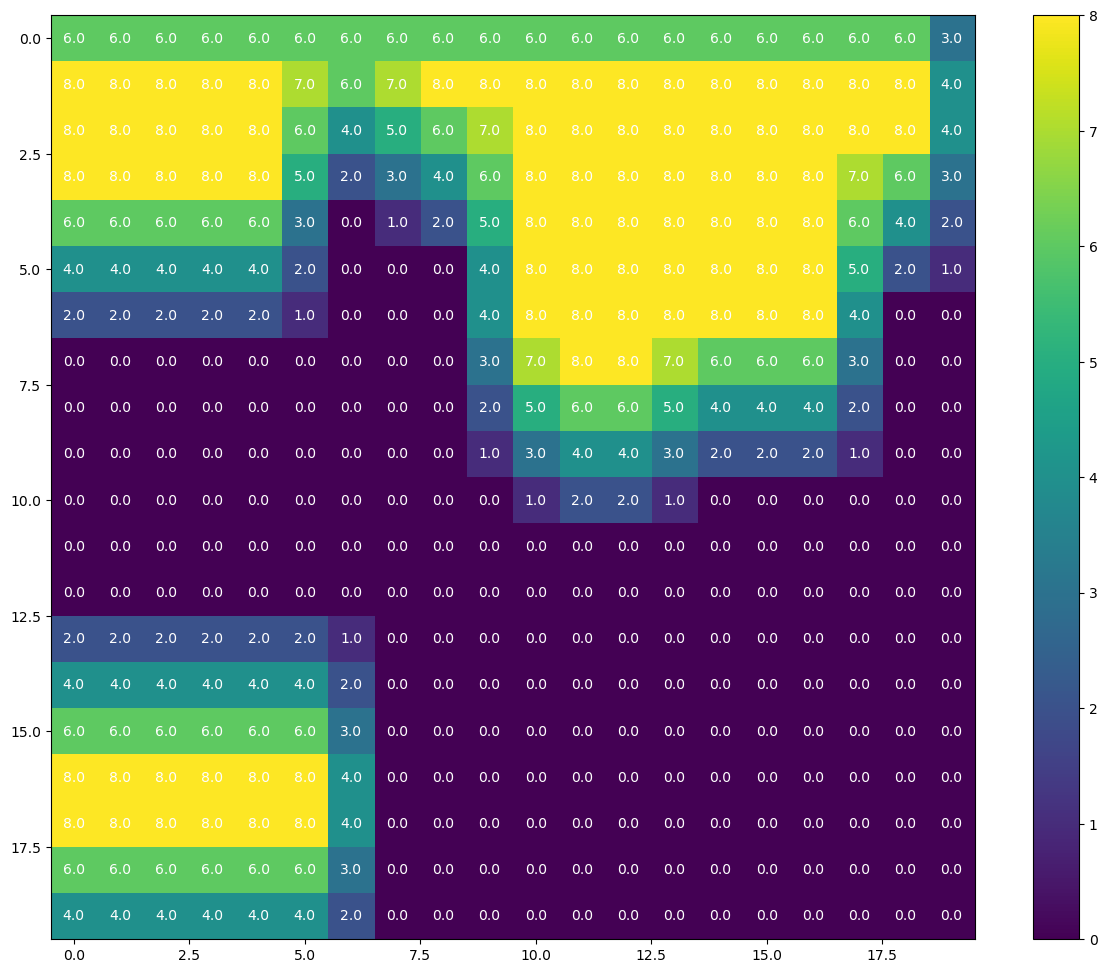

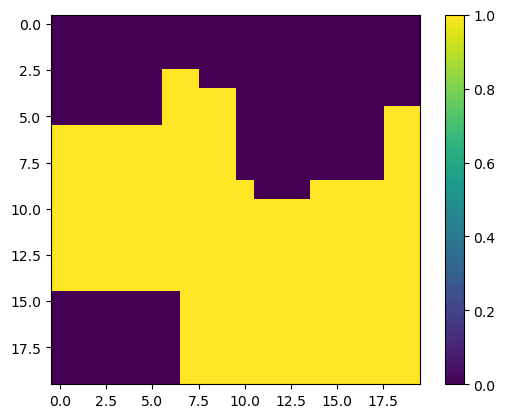

In [19]:
plt.figure(figsize=(15,12))
plt.imshow(out.squeeze(0).numpy())
s = out.squeeze(0).detach().numpy()
for i in range(s.shape[0]):
    for j in range(s.shape[1]):
        plt.annotate(str(s[i][j]), xy=(j, i),
                     ha='center', va='center', color='white')

plt.colorbar()
plt.show()
plt.imshow(filmask.astype(np.float32))
plt.colorbar()
plt.show()
 

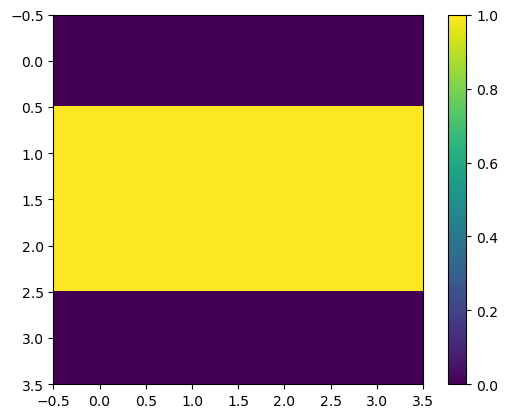

In [13]:
plt.imshow(footprint_mask.transpose())
plt.colorbar()